# Plot initialisation

In [19]:
import numpy as np
import matplotlib.pyplot as plt  # for plots
from matplotlib import rc
import seaborn as sns
sns.set_style("white")

dirname = "srcimages/"
imageformat = '.pdf'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'text.fontsize': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)
mc3my_brown = (0.64, 0.16, 0.16)
purple = (148. / 255, 0, 211. / 255)
plt.close("all")

In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Empirical mean:

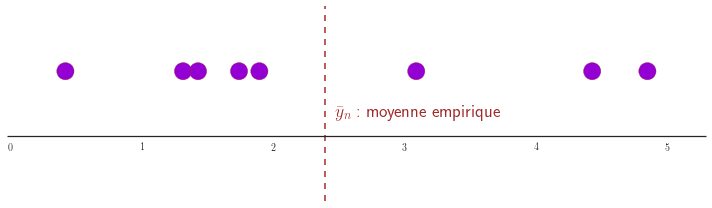

In [32]:
mu = 1.5
sigma = 4
nb_samples = 8

np.random.seed(seed=2)
rgamma = np.random.gamma
# get random nb_samples observations from a gamma law
X = rgamma(mu, sigma, nb_samples)
y = np.ones(nb_samples,)

# Various statistics:
meanX = np.mean(X)
minX = np.min(X)
maxX = np.max(X)
medX = np.median(X)
# Median absolute deviation (médiane des écarts à la médiane) pour la série X
MADX = np.median(np.abs(X - medX))
# Standard deviation i.e. écart type pour la série X
s = np.std(X)

# Création d'une figure
fig1, ax = plt.subplots(figsize=(10, 3))
# limitation de la figure à l'intervalle [0,1.5] sur l'axe vertical
ax.set_ylim(0, 1.5)
# limitation de la figure à l'intervalle [minX-10%(maxX-minX),maxX+10%(maxX-minX)]
# pour s'assurer que tous les points puissent être affichés
# np.ptp(X) ==> peak to peak (sommet à sommet) sur une série retourne maxX-minX
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
# retirer les ticks par défaut sur l'axe horizontal
ax.get_xaxis().tick_bottom()
# pas d'axe vertical
ax.axes.get_yaxis().set_visible(False)

# Rendre invisible les bords right, top & left de la figure
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
# Relever le bord bottom de la figure à la hauteur 0.5
ax.spines['bottom'].set_position(('data', 0.5))

# Dessiner les points (x_i,y_i) i=1..8 (rem: y_i=1 pour tout i)
# points sous forme de cercles (marker='o') intérieur noir, contour mc3my_brown,
# Je pense que c=purple ne sert pas
# faceted = True ???
ax.scatter(X, y, s=300, c=purple, edgecolors=mc3my_brown,
           marker='o', faceted=True)

# Dessiner une ligne verticale en pointillés (linestyle="--") à l'endroit de
# la moyenne des X
ax.plot([meanX, meanX], [0, 1.5], color=mc3my_brown,
        linewidth=1.5, linestyle="--")

# afficher "y" comme label de l'axe horizontal
plt.xlabel(r'$y$', fontsize=18)

# Créer l'annotation ybarre_n : moyenne empirique à 0.4 de la ligne en pointillés
plt.annotate(r'$\bar{y}_n : \mbox{moyenne empirique}$',
             xy=(meanX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color =mc3my_brown)

# Pour s'assurer que toutes les informations seront bien en totalité
# dans le cadre intérieur de la figure
plt.tight_layout()

## Empirical mean / median

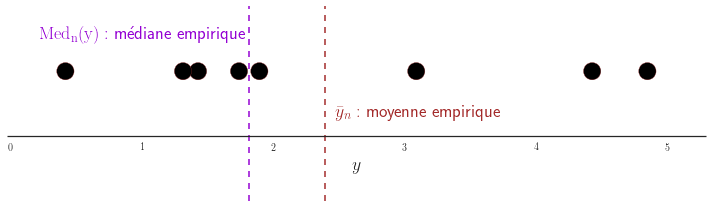

In [33]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, color='black', s=300, c=purple, edgecolors=mc3my_brown,
           marker='o', faceted=True)
ax.plot([meanX, meanX], [0, 1.5], color=mc3my_brown, linewidth=1.5,
        linestyle="--")
ax.plot([medX, medX], [0, 1.5], color=purple, linewidth=1.5, linestyle="--")

plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\rm{Med}_n(\mathbb{y}): \mbox{m\'ediane empirique}$',
             xy=(medX, 1), xycoords='data', xytext=(-210, +30),
             textcoords='offset points', fontsize=18, color =purple)
plt.annotate(r'$\bar{y}_n : \mbox{moyenne empirique}$', xy=(meanX, 0.4),
             xycoords='data', xytext=(+10, +30), textcoords='offset points',
             fontsize=18, color =mc3my_brown)

plt.tight_layout()

## Standard deviation (écart type de la série):

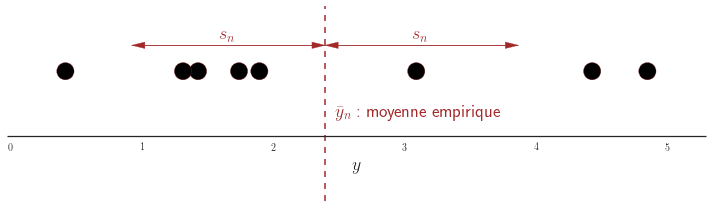

In [34]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, color='black', s=300, c=purple, edgecolors=mc3my_brown,
           marker='o', faceted=True)

ax.plot([meanX, meanX], [0, 1.5], color=mc3my_brown, linewidth=1.5,
        linestyle="--")
plt.arrow(meanX, 1.2, -s, 0, fc=mc3my_brown, ec=mc3my_brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX - s, 1.2, s, 0, fc=mc3my_brown, ec=mc3my_brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX, 1.2, s, 0, fc=mc3my_brown, ec=mc3my_brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX + s, 1.2, -s, 0, fc=mc3my_brown, ec=mc3my_brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)


plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\bar{y}_n : \mbox{moyenne empirique}$',
             xy=(meanX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color =mc3my_brown)
plt.annotate(r'$s_n$', xy=(meanX + s * (0.4), 1), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=18,
             color = mc3my_brown)
plt.annotate(r'$s_n$', xy=(meanX - s * (0.6), 1), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=18,
             color =mc3my_brown)

plt.tight_layout()

## Mean Absolute Deviation:

écart absolu moyen<br>ou encore<br>moyenne des écarts à la moyenne<br>Il s'agit d'une des mesures de dispersion de la série

In [46]:
from IPython.display import display, Math, Latex
display(Math(r'MAD = \frac{1}{n}\sum_{i=1}^{n}\left | x_i-\bar{x} \right |'))

<IPython.core.display.Math object>

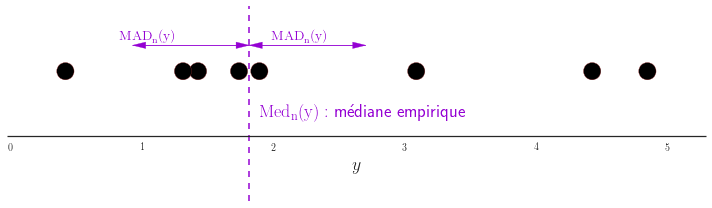

In [35]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, color='black', s=300, c=purple, edgecolors=mc3my_brown,
           marker='o', faceted=True)

ax.plot([medX, medX], [0, 1.5], color=purple, linewidth=1.5, linestyle="--")

plt.arrow(medX, 1.2, -MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX - MADX, 1.2, MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX, 1.2, MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX + MADX, 1.2, -MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)

plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\rm{Med}_n(\mathbb{y}): \mbox{m\'ediane empirique}$',
             xy=(medX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color=purple)
plt.annotate(r'$\rm{MAD}_n(\mathbb{y})$', xy=(medX + MADX * (0.1), 1),
             xycoords='data', xytext=(+10, +30), textcoords='offset points',
             fontsize=14, color =purple)
plt.annotate(r'$\rm{MAD}_n(\mathbb{y})$', xy=(medX - MADX * (1.2), 1),
             xycoords='data', xytext=(+10, +30), textcoords='offset points',
             fontsize=14, color =purple)

plt.tight_layout()